In [1]:
import sys
sys.path.append('/mnt/storage/documents/personal/programming/mpl_animation')
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation

from IPython.display import HTML

%matplotlib inline

from rotation import rotate_2d
import shapes_2d
import plotting_utils
from useful_functions import smooth_rotation_increments


In [2]:
def plot_square(square, ax):
    edges = square.get_all_edges()
    drawn_edges = []
    for edge in edges:
        drawn_edges.append(ax.plot(edge[0], edge[1], lw=4, c='k'))
    corners = square.get_all_corners()
    drawn_corners = ax.scatter(corners[0], corners[1], s=224, c='k')
    ax.set_aspect('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    return drawn_corners, drawn_edges

In [3]:
def init():
    sq_rot_simple = shapes_2d.RegularPolygon(4)
    sq_rot_edges_center = shapes_2d.RegularPolygon(4)
    sq_rot_edges_extremities = shapes_2d.RegularPolygon(4)
    sq_rot_edges_and_extremities = shapes_2d.RegularPolygon(4)
    
    fig, axes = plt.subplots(2,2)
    fig.set_size_inches(8,8)
    plt.tight_layout()
    
    ax_rot_simple = axes[0][0]
    ax_rot_edges_center = axes[0][1]
    ax_rot_edges_extremities = axes[1][0]
    ax_rot_edges_and_extremities = axes[1][1]
    
    dc_rs, de_rs = plot_square(sq_rot_simple, ax_rot_simple)
    dc_rec, de_rec = plot_square(sq_rot_edges_center, ax_rot_edges_center)
    dc_ree, de_ree = plot_square(sq_rot_edges_extremities, ax_rot_edges_extremities)
    dc_reac, de_reac = plot_square(sq_rot_edges_and_extremities, ax_rot_edges_and_extremities)
    
    return (fig, 
            sq_rot_simple, 
            sq_rot_edges_center, 
            sq_rot_edges_extremities, 
            sq_rot_edges_and_extremities,
            dc_rs, de_rs,
            dc_rec, de_rec,
            dc_ree, de_ree,
            dc_reac, de_reac)

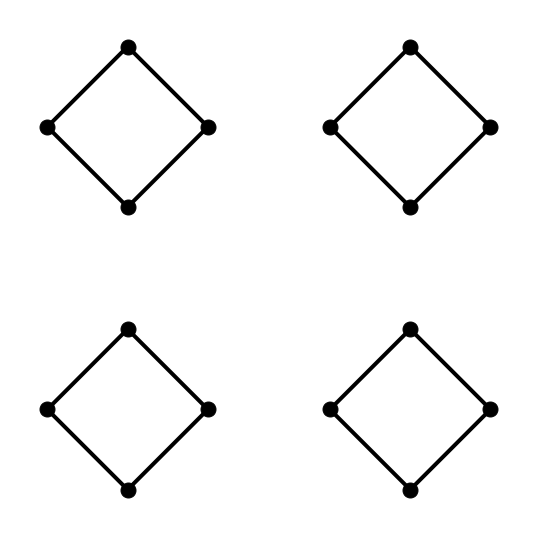

In [4]:
_ = init()

In [68]:
def redraw(square, drawn_corners, drawn_edges):
    x_corners, y_corners = square.get_all_corners()
    plotting_utils.redraw_scatter(drawn_corners, x_corners, y_corners)
    
    edges = square.get_all_edges()
    for idx, edge in enumerate(drawn_edges):
        plotting_utils.redraw_line(edge[0], edges[idx][0], edges[idx][1])
    
    return None

def animate_frame(t):
    theta = rotation_angles[t]
    
    sq_rot_simple.rotate_all_edge_centers(-theta)
    sq_rot_simple.rotate_all_edge_extremities(-theta)
    
#     sq_rot_edges_center.rotate(-theta)
    sq_rot_edges_center.rotate_all_edge_centers(-theta)
    
#     sq_rot_edges_extremities.rotate(-theta)
    sq_rot_edges_extremities.rotate_all_edge_extremities(-theta)
    
    
#     sq_rot_edges_and_extremities.rotate(-theta)
    sq_rot_edges_and_extremities.rotate_all_edges_around_start(0.25*theta)
    #sq_rot_edges_and_extremities.rotate_all_edge_extremities(theta)
    
    redraw(sq_rot_simple, dc_rs, de_rs)
    redraw(sq_rot_edges_center, dc_rec, de_rec)
    redraw(sq_rot_edges_extremities, dc_ree, de_ree)
    redraw(sq_rot_edges_and_extremities, dc_reac, de_reac)
    
    return  dc_rs, de_rs, dc_rec, de_rec, dc_ree, de_ree, dc_reac, de_reac

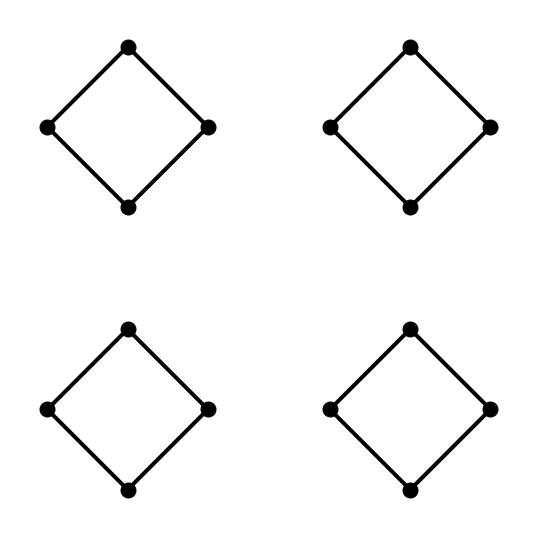

In [69]:
n_frames = 250
total_time = 250 * 15 # heuristic


rotation_angles = smooth_rotation_increments(n_frames)
interval = total_time / n_frames
(fig, 
sq_rot_simple, 
sq_rot_edges_center, 
sq_rot_edges_extremities, 
sq_rot_edges_and_extremities,
dc_rs, de_rs,
dc_rec, de_rec,
dc_ree, de_ree,
dc_reac, de_reac) = init()

animation = matplotlib.animation.FuncAnimation(fig, 
                                               func=animate_frame, 
                                               frames=range(n_frames), 
                                               interval=interval)

HTML(animation.to_html5_video())